In [1]:
# import sys
# lattice.sys.path.append('..')
from fermiqp.imports import *
from fermiqp.lattice import *
from fermiqp.experiments import *

import fermiqp_style as fqpstyle

from fermiqp_style.style import SPINDOWN, SPINUP

fqpstyle.set_theme()

from scipy.linalg import eigh

## Benchmark: simplest 1D lattice

(-2.0, 2.0)

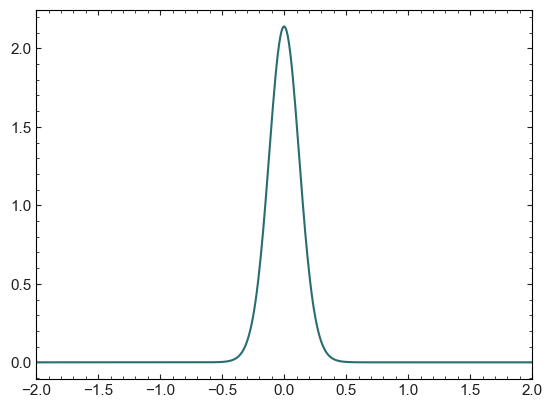

In [2]:
from fermiqp.lattice import Lattice1D

lattice = Lattice1D(V = 50, x_num=1000,x_max=5)
lattice.get_bloch()
w = lattice.get_wannier(band_index=[0,1,2,3])[0]
x = lattice.x_vals
# w = w/(np.trapezoid(np.abs(w)**2, x=x))**0

plt.plot(x, w.real, '-')

plt.xlim(-2,2)


# Superlattice

(-1.0, 1.0)

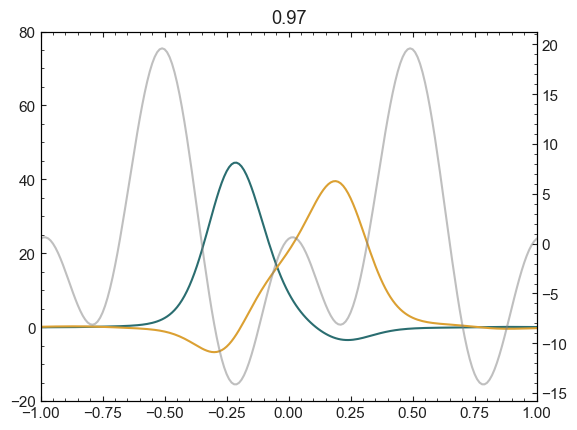

In [3]:
from fermiqp.lattice import Superlattice1D

lattice = Superlattice1D(Vs=20, Vl=20, phi=np.pi*0.05, x_num=1000, x_max=5)

x = lattice.x_vals
wL, wR = lattice.get_wannier()
potential = lattice.potential()


plt.plot(x, wL.real, '-')
plt.plot(x, wR.real, '-')

plt.ylim(-20, 80)

plt.twinx()
plt.plot(x, potential, '-', color='gray', alpha=0.5)



plt.title(f'{lattice.s:.2f}')

plt.xlim(-1,1)

## 2D

In [4]:
lattice = Lattice2D(V=10, theta=0.1, r_max=2, r_num=200)


wL, wR = lattice.get_wannier()
X, Y = lattice.X, lattice.Y

(-1.0, 1.0)

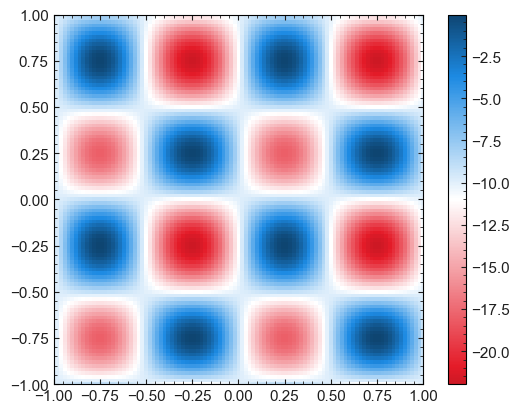

In [5]:
V = lattice.potential()

plt.pcolormesh(X, Y, V, shading='auto', cmap='diverging_r')

plt.colorbar()

plt.gca().set_aspect('equal', adjustable='box')

plt.xlim(-1,1)
plt.ylim(-1,1)

In [7]:
lattice.tunneling()

(np.float64(0.010730293426635935),
 np.float64(-0.010091456775500447),
 np.float64(0.0016872713277577666),
 np.float64(0.1691837817848896))

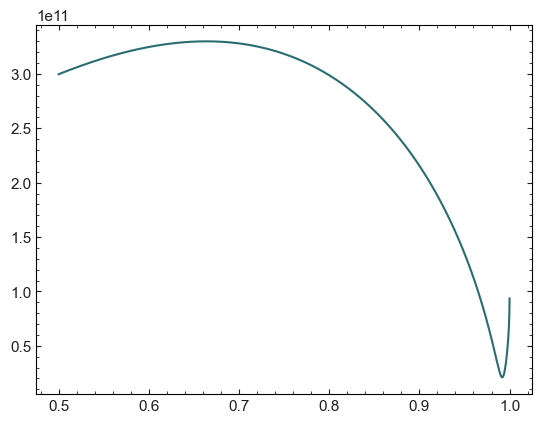

In [9]:
plt.plot(lattice.s_vals, lattice.costs, '-')
# plt.yscale('log')

In [12]:
np.sum(np.abs(wL)**2*wL.conj()*wR)/np.sum(np.abs(wL)**4)

np.complex128(-0.008346755013763772+3.0463034727043246e-07j)

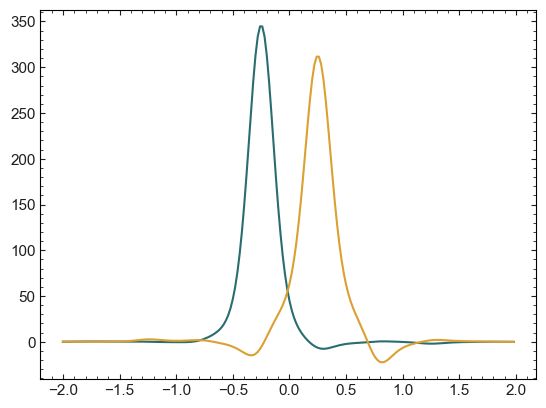

In [31]:
plt.plot(lattice.r_vals, (wL).diagonal().real, '-')
plt.plot(lattice.r_vals, (wR).diagonal().real, '-')

In [ ]:
from ipywidgets import interact, FloatSlider

def plot_wannier(s=None):


    wL, wR = lattice.band_mixing(s=s)


    fig, axs = plt.subplots(figsize=(8,4), ncols=2, sharey=True)

    axs[0].pcolormesh(X, Y, np.abs(wL).real, shading='auto', cmap='diverging')
    axs[1].pcolormesh(X, Y, np.abs(wR).real, shading='auto', cmap='diverging')


    plt.suptitle(f'lattice.s = {lattice.s:.3f}')


    for ax in axs:
        ax.set_aspect('equal', adjustable='box')
    # ax.set_xlim(-1,1)
    # ax.set_ylim(-1,1)


interact(plot_wannier, s=FloatSlider(min=0.5, max=1, step=0.01, value=lattice.s))

interactive(children=(FloatSlider(value=0.9917458729364682, description='s', max=1.0, min=0.5, step=0.01), Out…

<function __main__.plot_wannier(s=None)>